In [83]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
cr_df = pd.merge(city_df, ride_df, on = 'city')
# Display the data table for preview
cr_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


Separate data by city type

In [84]:
urban = cr_df.loc[cr_df['type'] == 'Urban']
urban.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [85]:
suburban = cr_df.loc[cr_df['type'] == 'Suburban']
suburban.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


In [86]:
rural = cr_df.loc[cr_df['type'] == 'Rural']
rural.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [87]:
#averages by city by city type to calculate each of the average fares
urban_by_city_df = urban.groupby(['city']).mean()
suburban_by_city_df = suburban.groupby(['city']).mean()
rural_by_city_df = rural.groupby(['city']).mean()
urban_by_city_df.head()

,driver_count,fare,ride_id
city,,,
Amandaburgh,12.0,24.641667,5.359336e+12
Barajasview,26.0,25.332273,4.676968e+12
Carriemouth,52.0,28.314444,5.184855e+12
Christopherfurt,41.0,24.501852,4.582307e+12
Deanville,49.0,25.842632,4.901508e+12


In [88]:
#counts by city and city type to get rides per city
urban_city_count_df = urban.groupby(['city']).count()
suburban_city_count_df = suburban.groupby(['city']).count()
rural_city_count_df = rural.groupby(['city']).count()
urban_city_count_df.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Carriemouth,27,27,27,27,27
Christopherfurt,27,27,27,27,27
Deanville,19,19,19,19,19


In [89]:
sorted_city = urban.sort_values(by=['city'])

sorted_city.head()

,city,driver_count,type,date,fare,ride_id
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1521,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


## Bubble Plot of Ride Sharing Data

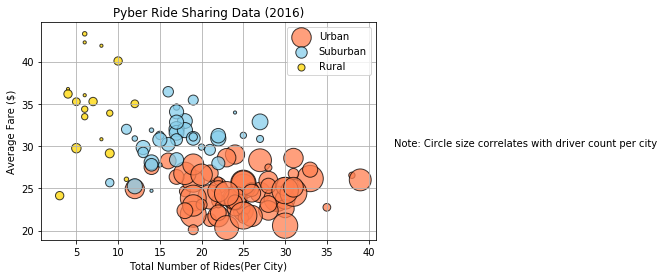

In [90]:
# Obtain the x and y coordinates for each of the three city types
# y-axis = Average Fare ($) Per City
urban_avg_fare = urban_by_city_df['fare']
suburban_avg_fare = suburban_by_city_df['fare']
rural_avg_fare = rural_by_city_df['fare']

# x-axis = Total Number of Rides Per City
urban_rides_per_city = urban_city_count_df['ride_id']
suburban_rides_per_city = suburban_city_count_df['ride_id']
rural_rides_per_city = rural_city_count_df['ride_id']

# bubble size = number of drivers per city
urban_drivers_per_city = urban_by_city_df['driver_count']
suburban_drivers_per_city = suburban_by_city_df['driver_count']
rural_drivers_per_city = rural_by_city_df['driver_count']

# Build the scatter plots for each city types
plt.scatter(urban_rides_per_city, urban_avg_fare, s=urban_drivers_per_city*10, marker="o", facecolors="coral", edgecolors="black",
            alpha=0.75, label = 'Urban')
plt.scatter(suburban_rides_per_city, suburban_avg_fare,s=suburban_drivers_per_city*10, marker="o", facecolors="skyblue", edgecolors="black",
             alpha=0.75, label = 'Suburban')
plt.scatter(rural_rides_per_city, rural_avg_fare, marker="o", s=rural_drivers_per_city*10, facecolors="gold", edgecolors="black", 
            alpha=0.75, label ='Rural')
# Incorporate the other graph properties
plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc = 'upper right')

# Incorporate a text label regarding circle size
textstr = "Note: Circle size correlates with driver count per city "
plt.text(43, 30, textstr, fontsize=10)

# Save Figure
plt.savefig("../Images/PyberRideSharingData.png")

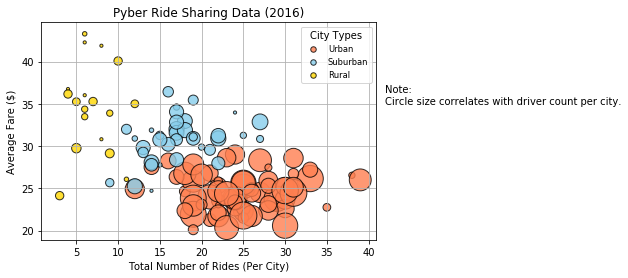

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

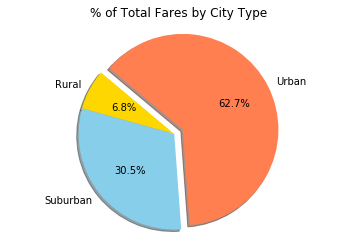

In [79]:
# Calculate Type Percents
fares_by_city_df = cr_df.groupby(['type']).sum()
fares_by_city_df.head()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(fares_by_city_df['fare'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save Figure
plt.savefig("../Images/FarePie.png")
# Show Figure
plt.show()

## Total Rides by City Type

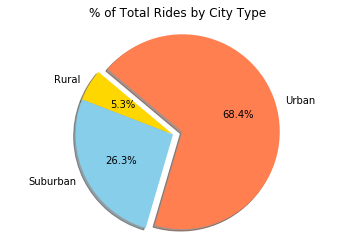

In [73]:
# Calculate Type Percents
rides_by_city_df = cr_df.groupby(['type']).count()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(rides_by_city_df['ride_id'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save Figure
plt.savefig("../Images/RidePie.png")

## Total Drivers by City Type

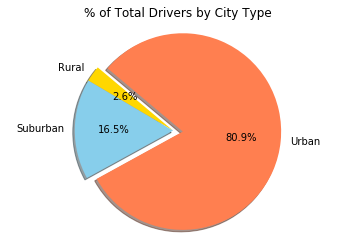

In [78]:
# Calculate Type Percents
drivers_by_city_df = city_df.groupby(['type']).sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(drivers_by_city_df['driver_count'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save Figure
plt.savefig("../Images/DriverPie.png")
# Show Figure
plt.show()